# New York City Airbnb Open Data
ที่มา: New York City Airbnb Open Data on Kaggle


Step 1: นำเข้าชุดข้อมูลและติดตั้งไลบรารีที่จำเป็น
- ติดตั้งไลบรารี: บน Google Colab ไลบรารีหลัก ๆ เช่น pandas, matplotlib, และ seaborn จะถูกติดตั้งไว้อยู่แล้ว แต่เราจะติดตั้ง plotly เพื่อช่วยในการสร้างแผนที่ความหนาแน่น
- นำเข้าชุดข้อมูล: เนื่องจาก Kaggle มีข้อกำหนดในการดาวน์โหลด เราจะใช้ Kaggle API เพื่อดาวน์โหลดข้อมูลนี้มาโดยตรง

In [1]:
# ติดตั้งไลบรารี Kaggle และ Plotly
!pip install kaggle plotly

# อัปโหลดไฟล์ Kaggle API Key เพื่อเข้าถึงข้อมูลใน Kaggle
from google.colab import files
files.upload()  # เลือกไฟล์ kaggle.json

# สร้างโฟลเดอร์ .kaggle และย้ายไฟล์ kaggle.json ไปยังโฟลเดอร์นี้
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# ตั้งสิทธิ์ให้ไฟล์ API Key
!chmod 600 ~/.kaggle/kaggle.json

# ดาวน์โหลดข้อมูลจาก Kaggle โดยใช้ API
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

# แตกไฟล์ข้อมูลที่ดาวน์โหลด
!unzip new-york-city-airbnb-open-data.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
License(s): CC0-1.0
  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 102MB/s]
Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


Step 2:
- นำเข้าข้อมูลและตรวจสอบข้อมูลเบื้องต้น
ตอนนี้เราจะนำเข้าข้อมูลและตรวจสอบข้อมูลเพื่อดูโครงสร้างและค่าที่ขาดหายของชุดข้อมูล



In [2]:
import pandas as pd

# นำเข้าข้อมูลที่ดาวน์โหลดมา
df = pd.read_csv('AB_NYC_2019.csv')

# แสดงข้อมูลเบื้องต้น
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Step 3: ตรวจสอบค่าที่ขาดหายและทำความสะอาดข้อมูล
- เราจะดูค่าที่ขาดหายของแต่ละคอลัมน์และลบหรือแทนที่ค่าที่หายไปเพื่อให้ชุดข้อมูลสะอาดพร้อมใช้งาน

In [3]:
# ตรวจสอบค่าที่ขาดหายในแต่ละคอลัมน์
df.isnull().sum()

# แทนที่ค่าที่ขาดหาย (Missing Values)
df['reviews_per_month'].fillna(0, inplace=True)
df.dropna(subset=['last_review'], inplace=True)

<ipython-input-3-81eead871267>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


Step 4: วิเคราะห์ข้อมูลเบื้องต้น
- การตรวจสอบสถิติเบื้องต้นของคอลัมน์ เช่น ราคา และจำนวนห้องพัก จะช่วยให้เราเข้าใจการกระจายตัวของข้อมูล

In [4]:
# แสดงข้อมูลสถิติเบื้องต้น
df[['price', 'minimum_nights', 'number_of_reviews']].describe()


,price,minimum_nights,number_of_reviews
count,38843.000000,38843.000000,38843.000000
mean,142.317947,5.868059,29.297557
std,196.945624,17.384784,48.186374
min,0.000000,1.000000,1.000000
25%,69.000000,1.000000,3.000000
50%,101.000000,2.000000,9.000000
75%,170.000000,4.000000,33.000000
max,10000.000000,1250.000000,629.000000


Step 5: สร้าง Density Map แสดงตำแหน่งของที่พัก Airbnb ใน New York
- แผนที่นี้จะช่วยให้เราเห็นการกระจายตัวของที่พักตามละแวกต่างๆ ใน New York ซึ่งสามารถใช้สีเพื่อสื่อถึงราคาได้ด้วย

In [17]:
import plotly.express as px

# ใช้ scatter_mapbox โดยไม่ต้องใช้ Mapbox Access Token
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', color='price',
                        size='price', color_continuous_scale="Viridis",
                        size_max=20, zoom=13,
                        mapbox_style="open-street-map")
fig.update_layout(title="Scatter Map of Airbnb Prices in NYC")
fig.show()


Step 6: สร้าง Box Plot เพื่อแสดงการกระจายของราคาตามประเภทของห้องพัก
- Box Plot นี้จะช่วยให้เราเห็นการกระจายของราคาตามประเภทของห้อง เช่น Entire home/apt, Private room เป็นต้น

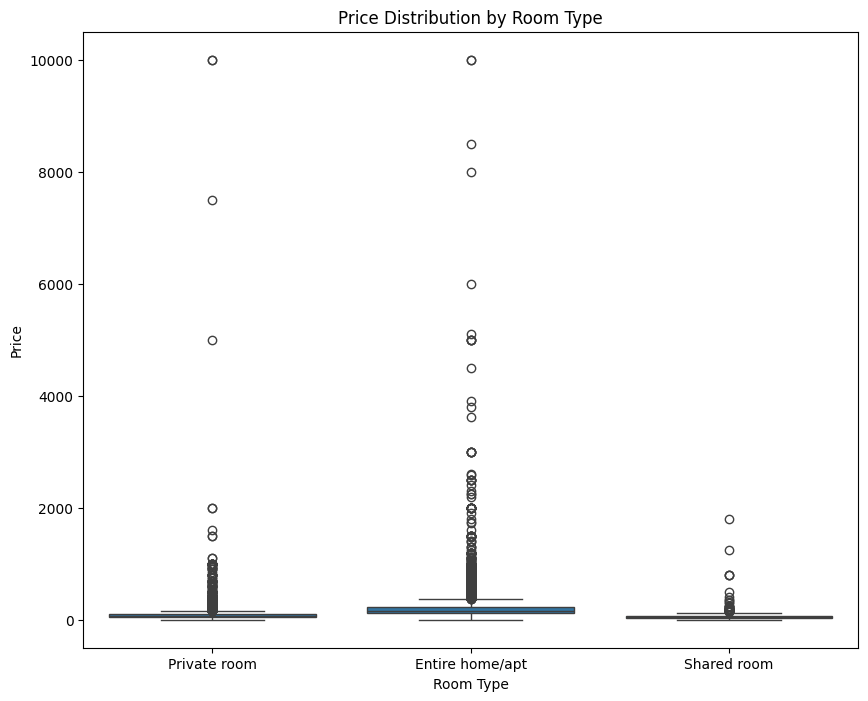

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# ตั้งค่าขนาดของกราฟ
plt.figure(figsize=(10, 8))

# สร้าง Box Plot
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


Step 7: สร้าง Heatmap แสดงจำนวนรีวิวตามเขตต่างๆ ของ New York
- Heatmap นี้จะแสดงจำนวนรีวิวในแต่ละเขต (borough) ของ New York เพื่อดูว่าพื้นที่ไหนมีที่พักที่ได้รับความนิยมมาก

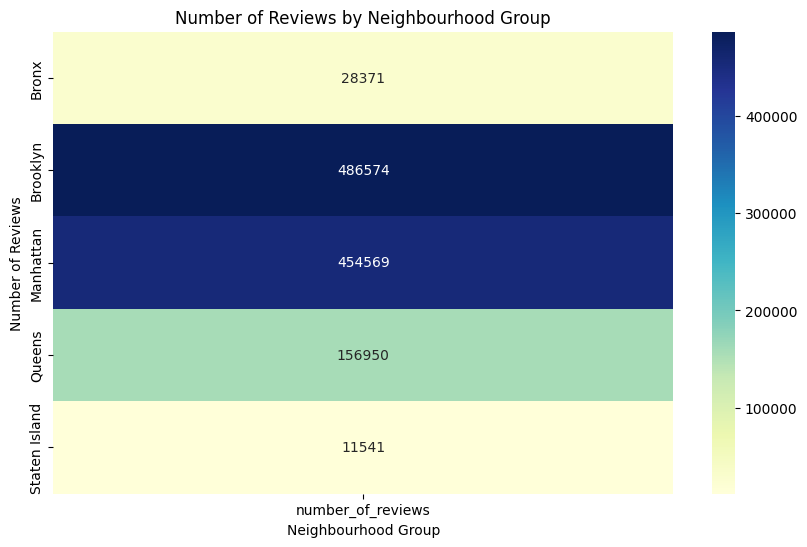

In [22]:
# สร้างตาราง Pivot แสดงจำนวนรีวิวในแต่ละเขต
pivot_table = df.pivot_table(index='neighbourhood_group', values='number_of_reviews', aggfunc='sum')

# ตั้งค่าขนาดของกราฟ
plt.figure(figsize=(10, 6))

# สร้าง Heatmap
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title('Number of Reviews by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')
plt.show()


Step 8: สร้าง Line Plot แสดงจำนวนรีวิวที่เพิ่มขึ้นตามช่วงเวลา
- Line Plot นี้จะแสดงจำนวนรีวิวที่เพิ่มขึ้นตามช่วงเวลา เพื่อดูแนวโน้มของความนิยมในที่พัก Airbnb

In [25]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


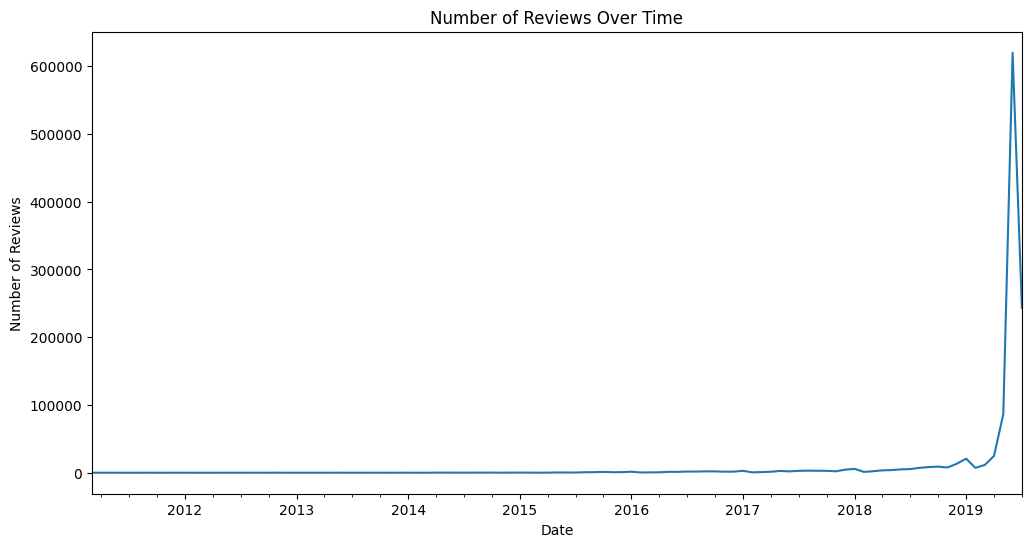

In [24]:
# แปลงคอลัมน์ last_review เป็น DateTime
df['last_review'] = pd.to_datetime(df['last_review'])

# กำหนดคอลัมน์ last_review เป็น index และรวมจำนวนรีวิวรายเดือน
monthly_reviews = df.set_index('last_review').resample('ME')['number_of_reviews'].sum()

# สร้าง Line Plot
plt.figure(figsize=(12, 6))
monthly_reviews.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


Step 9: สร้าง Scatter Plot เพื่อแสดงความสัมพันธ์ระหว่างราคาและจำนวนรีวิว
- Scatter Plot นี้จะแสดงความสัมพันธ์ระหว่างราคาและจำนวนรีวิว ซึ่งช่วยให้เราเห็นว่า ห้องพักที่มีราคาแพงขึ้นมีแนวโน้มที่จะได้รับรีวิวมากขึ้นหรือไม่

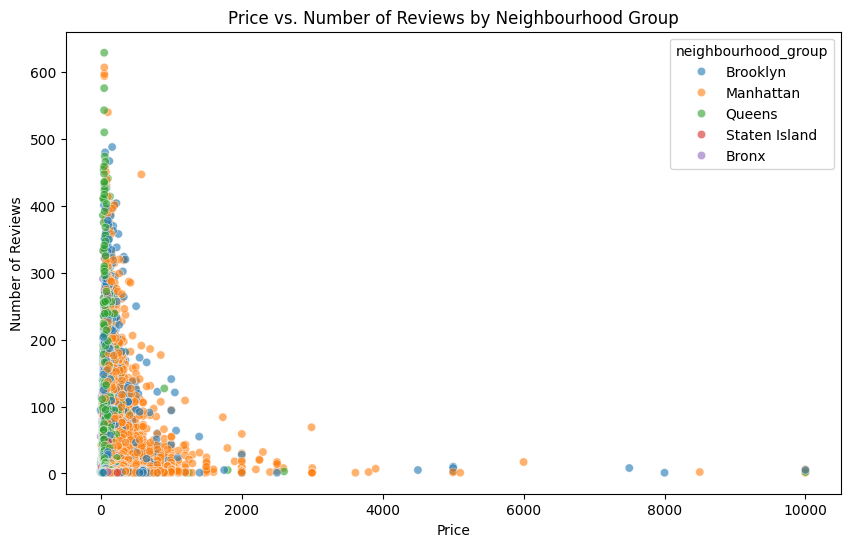

In [26]:
# สร้าง Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='number_of_reviews', hue='neighbourhood_group', alpha=0.6)
plt.title('Price vs. Number of Reviews by Neighbourhood Group')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()


Step 10: สร้าง Histogram เพื่อดูการกระจายตัวของราคาที่พัก
- การใช้ Histogram จะช่วยให้เราเห็นการกระจายตัวของราคาที่พักทั้งหมดใน New York และทำให้เรารู้ว่าราคาที่พักส่วนใหญ่จะอยู่ในช่วงใด ซึ่งเป็นข้อมูลสำคัญในการวิเคราะห์ราคา

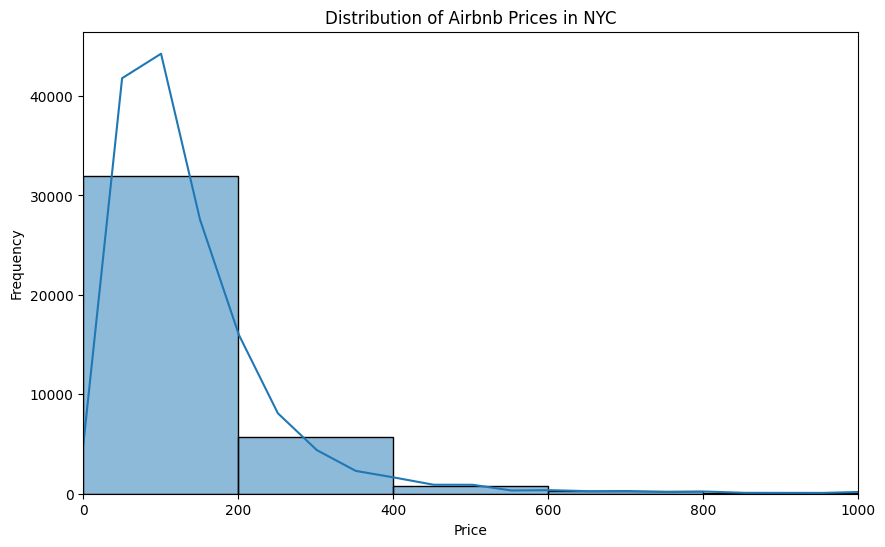

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Airbnb Prices in NYC')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # จำกัดช่วงราคาเพื่อให้ดูง่ายขึ้น
plt.show()


Step 11: สร้าง Pie Chart เพื่อแสดงสัดส่วนของประเภทที่พัก
- Pie Chart จะช่วยให้เห็นภาพรวมของสัดส่วนของประเภทที่พัก Airbnb เช่น Entire home/apt, Private room ฯลฯ เพื่อวิเคราะห์ความนิยมของแต่ละประเภท

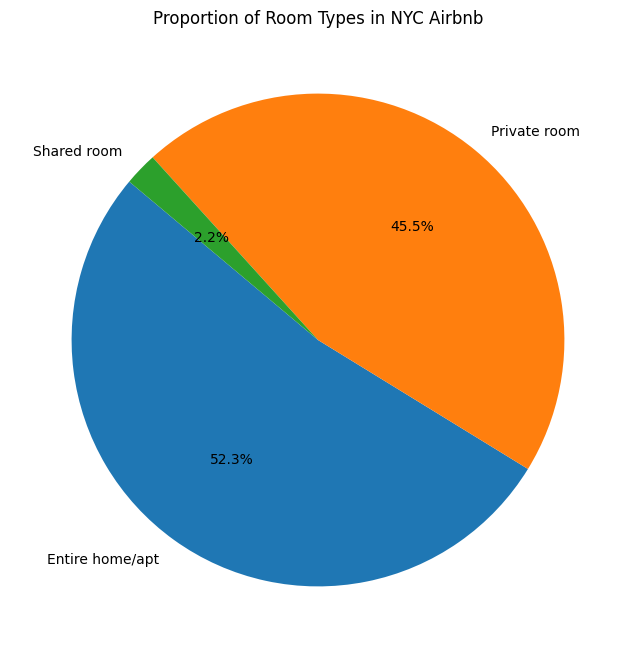

In [31]:
# นับจำนวนที่พักในแต่ละประเภท
room_counts = df['room_type'].value_counts()

# สร้าง Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Room Types in NYC Airbnb')
plt.show()


Step 12: สร้าง Bar Plot เพื่อเปรียบเทียบราคาที่พักเฉลี่ยในแต่ละเขต
- การใช้ Bar Plot จะแสดงให้เห็นถึงความแตกต่างของราคาที่พักเฉลี่ยในแต่ละเขต (neighbourhood group) ซึ่งสามารถช่วยให้เราเข้าใจว่าเขตไหนมีราคาสูงกว่ากัน



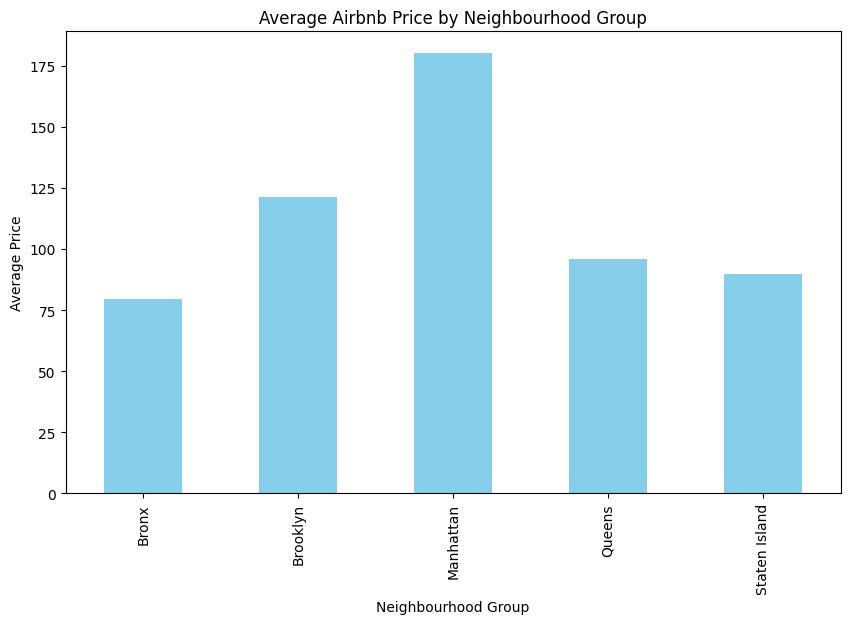

In [32]:
# คำนวณราคาที่พักเฉลี่ยในแต่ละเขต
average_price_by_neighbourhood = df.groupby('neighbourhood_group')['price'].mean()

# สร้าง Bar Plot
plt.figure(figsize=(10, 6))
average_price_by_neighbourhood.plot(kind='bar', color='skyblue')
plt.title('Average Airbnb Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()


Step 13: สร้าง Violin Plot
- เพื่อดูการกระจายตัวของราคาที่พักในแต่ละประเภทของห้องพัก
Violin Plot จะช่วยให้เห็นการกระจายตัวของราคาในแต่ละประเภทห้องพักได้ชัดเจนขึ้น ทั้งความหนาแน่นและการกระจายของราคาในแต่ละประเภท

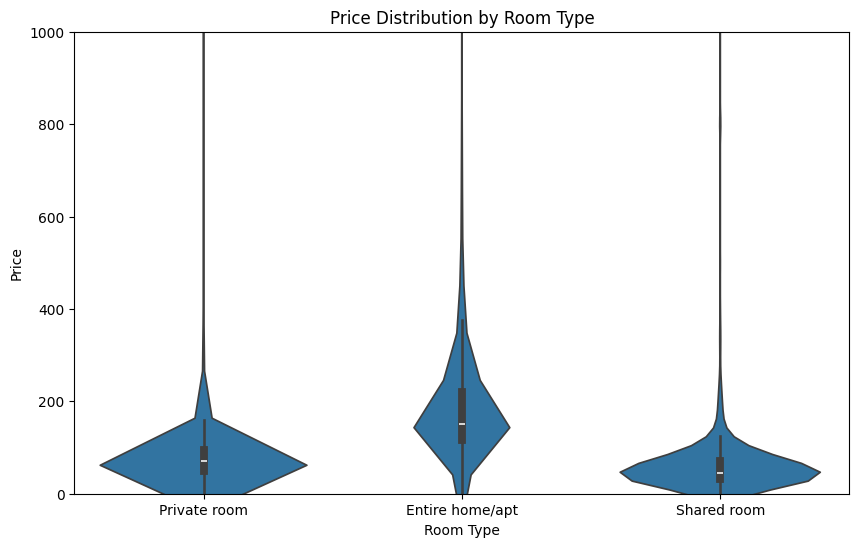

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.ylim(0, 1000)  # จำกัดช่วงราคาเพื่อแสดงผลได้ชัดเจนขึ้น
plt.show()


Step 14: สร้าง Pair Plot เพื่อดูความสัมพันธ์ระหว่างตัวแปรต่างๆ
- Pair Plot จะช่วยให้เราเห็นภาพรวมของความสัมพันธ์ระหว่างตัวแปรต่างๆ ในชุดข้อมูล เช่น ความสัมพันธ์ระหว่าง price, minimum_nights, และ number_of_reviews เป็นต้น

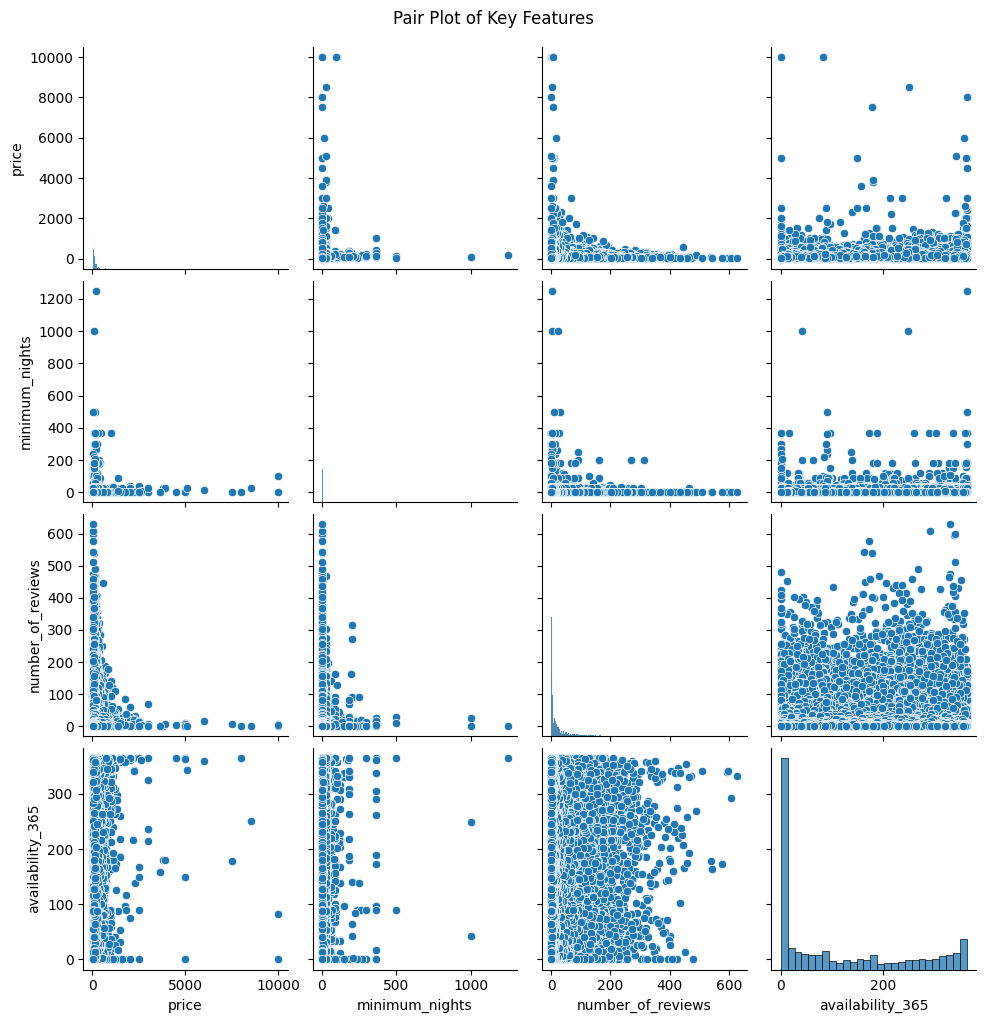

In [34]:
# เลือกคอลัมน์ที่ต้องการสร้าง Pair Plot
subset_df = df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']]

# สร้าง Pair Plot
sns.pairplot(subset_df)
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


Step 15: สร้าง Bubble Map เพื่อแสดงตำแหน่งที่พักและขนาดตามราคา
- Bubble Map ช่วยให้เราเห็นตำแหน่งของที่พักพร้อมทั้งขนาดที่แสดงถึงราคา ซึ่งจะช่วยให้เราดูว่าโซนไหนใน New York ที่มีราคาสูงหรือมีราคาต่ำ

In [35]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', size='price', color='neighbourhood_group',
                        color_continuous_scale="Viridis", size_max=15, zoom=10,
                        mapbox_style="open-street-map")
fig.update_layout(title="Bubble Map of Airbnb Prices in NYC by Neighbourhood Group")
fig.show()


Step 16: สร้าง Heatmap เพื่อดูความหนาแน่นของที่พักในแต่ละเขต
- Heatmap นี้จะช่วยให้เห็นความหนาแน่นของที่พักในแต่ละเขต โดยแสดงเป็นแผนที่ความร้อน (heat) ซึ่งจะแสดงบริเวณที่มีที่พักหนาแน่นมากขึ้น

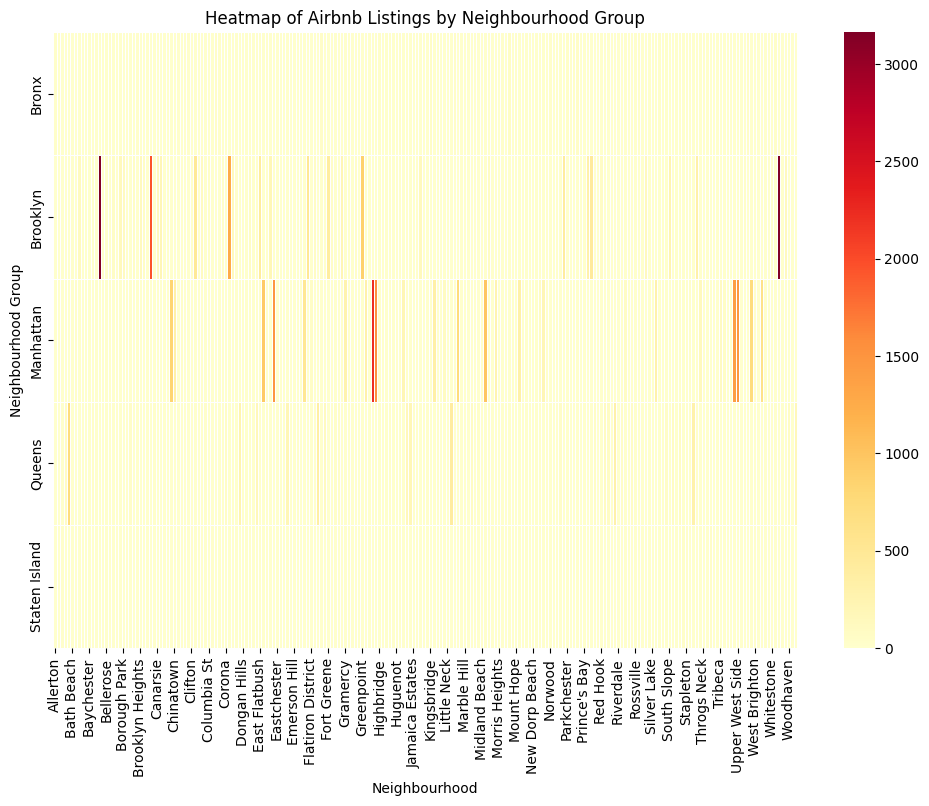

In [36]:
# สร้าง DataFrame ใหม่สำหรับจำนวนที่พักในแต่ละพื้นที่
heatmap_data = df.groupby(['neighbourhood_group', 'neighbourhood']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=.5)
plt.title("Heatmap of Airbnb Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood")
plt.ylabel("Neighbourhood Group")
plt.show()


Step 17: สร้าง Word Cloud จากชื่อที่พัก
- Word Cloud จะช่วยให้เราเห็นคำที่พบบ่อยในชื่อที่พัก ซึ่งสามารถบอกได้ว่าผู้คนชอบใช้คำใดในการตั้งชื่อที่พัก และอาจสะท้อนถึงลักษณะของที่พัก

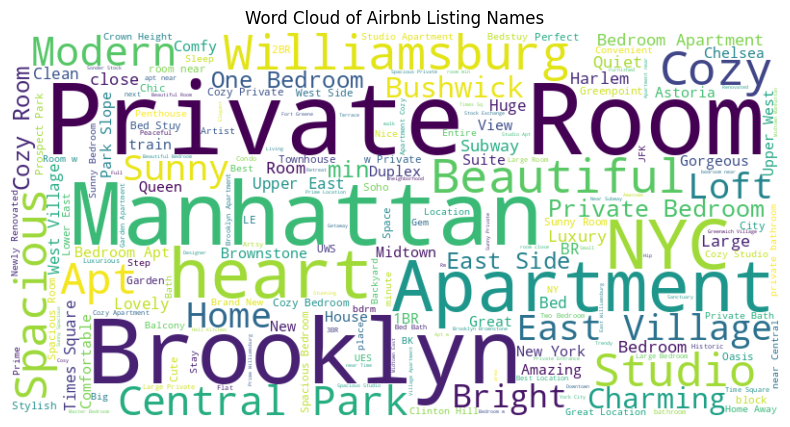

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# รวมชื่อที่พักทั้งหมด
text = " ".join(name for name in df['name'].astype(str))

# สร้าง Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# แสดงผล
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Airbnb Listing Names")
plt.show()


Step 18: สร้าง Box Plot ของจำนวนรีวิวตามเขตต่างๆ
- Box Plot นี้จะช่วยให้เห็นว่าบริเวณไหนที่มีที่พักซึ่งได้รับความนิยม (ในแง่จำนวนรีวิว) มากกว่าบริเวณอื่นๆ



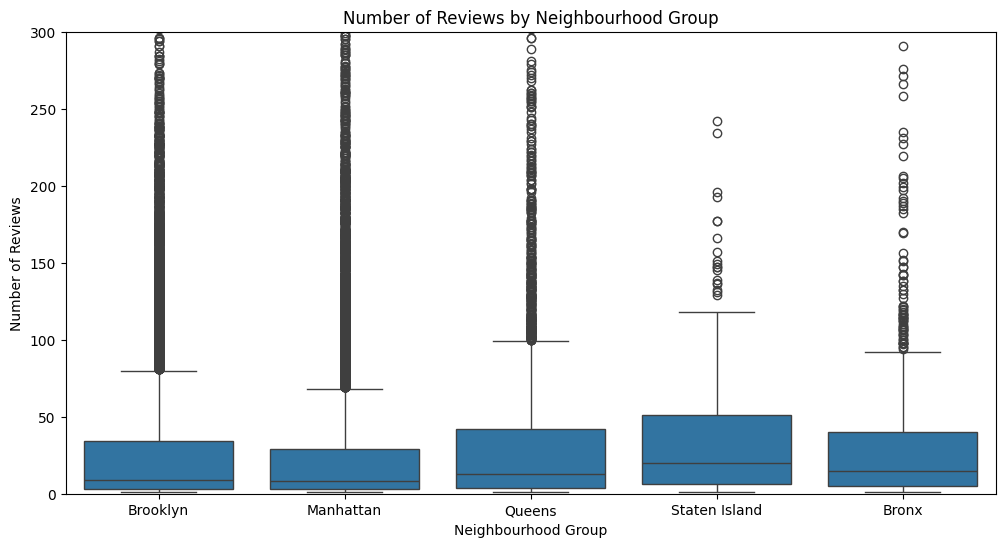

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='number_of_reviews', data=df)
plt.title('Number of Reviews by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')
plt.ylim(0, 300)  # จำกัดช่วงเพื่อให้ดูง่ายขึ้น
plt.show()

Step 19: สร้าง Line Plot แสดงจำนวนที่พักที่เปิดใหม่ในแต่ละปี
- การดูแนวโน้มจำนวนที่พักที่เพิ่มขึ้นในแต่ละปีจะช่วยให้เราเห็นภาพการเติบโตของ Airbnb ใน New York

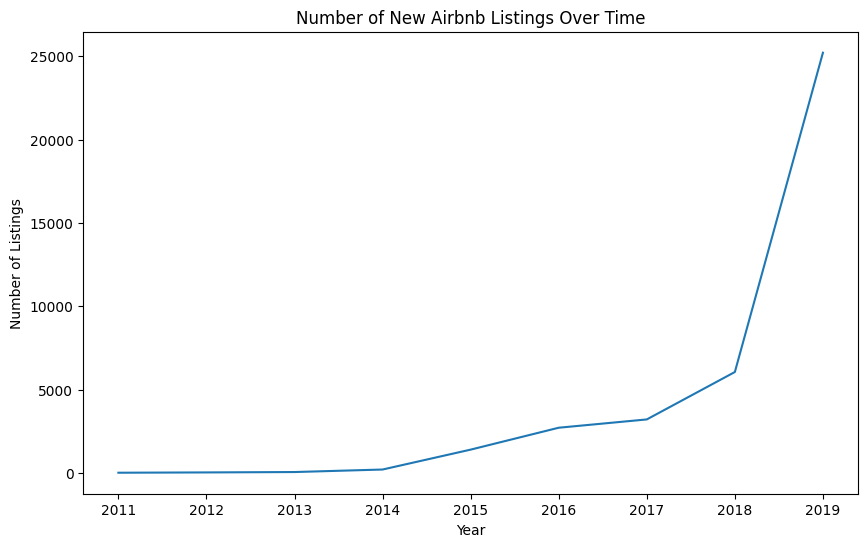

In [39]:
# แปลงคอลัมน์ last_review เป็นปี
df['last_review_year'] = pd.to_datetime(df['last_review']).dt.year

# คำนวณจำนวนที่พักที่เปิดใหม่ในแต่ละปี
listings_by_year = df.groupby('last_review_year').size()

# สร้าง Line Plot
plt.figure(figsize=(10, 6))
listings_by_year.plot(kind='line')
plt.title('Number of New Airbnb Listings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.show()


Step 20: สร้าง Lollipop Chart เพื่อเปรียบเทียบราคากับจำนวนรีวิว
- Lollipop Chart เป็นการผสมผสานระหว่างจุดและเส้นตรง ช่วยให้เห็นความสัมพันธ์ระหว่างสองตัวแปรได้ชัดเจน

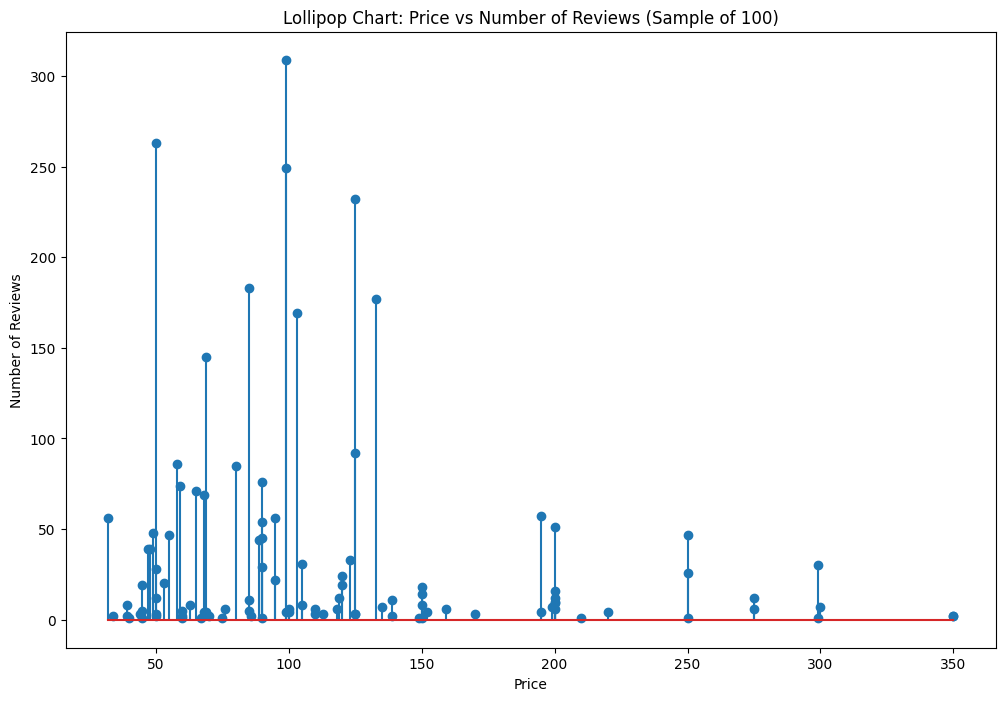

In [40]:
# เลือกข้อมูลตัวอย่าง 100 ตัวเพื่อแสดงผล
sample_df = df.sample(100)

# สร้าง Lollipop Chart
plt.figure(figsize=(12, 8))
plt.stem(sample_df['price'], sample_df['number_of_reviews'])
plt.title('Lollipop Chart: Price vs Number of Reviews (Sample of 100)')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()
